<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/01.%20Week%201/TugasWeek1_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
url = "https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/01.%20Week%201/Automobile.csv"
df = pd.read_csv(url)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
print("Jumlah data kosong : ")
print(df.isnull().sum())
print("Jumlah data duplikat : ",df.duplicated().sum())

Jumlah data kosong : 
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64
Jumlah data duplikat :  0


In [ ]:
df.describe()
df.describe(include=object)

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
count,205,205,205,205,205,205,205,205
unique,8,7,2,3,5,2,2,22
top,mpfi,ohc,front,fwd,sedan,std,gas,toyota
freq,94,148,202,120,96,168,185,32


In [ ]:
# Mengisi nilai kosong dengan median dari masing-masing kolom numerik
for col in df.select_dtypes(include=["number"]).columns:
    df[col] = df[col].fillna(df[col].median())  # Bisa diganti dengan mean()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
# Konversi data kategori ke numerik
df_numeric = pd.get_dummies(df, drop_first=True)

# Normalisasi fitur
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

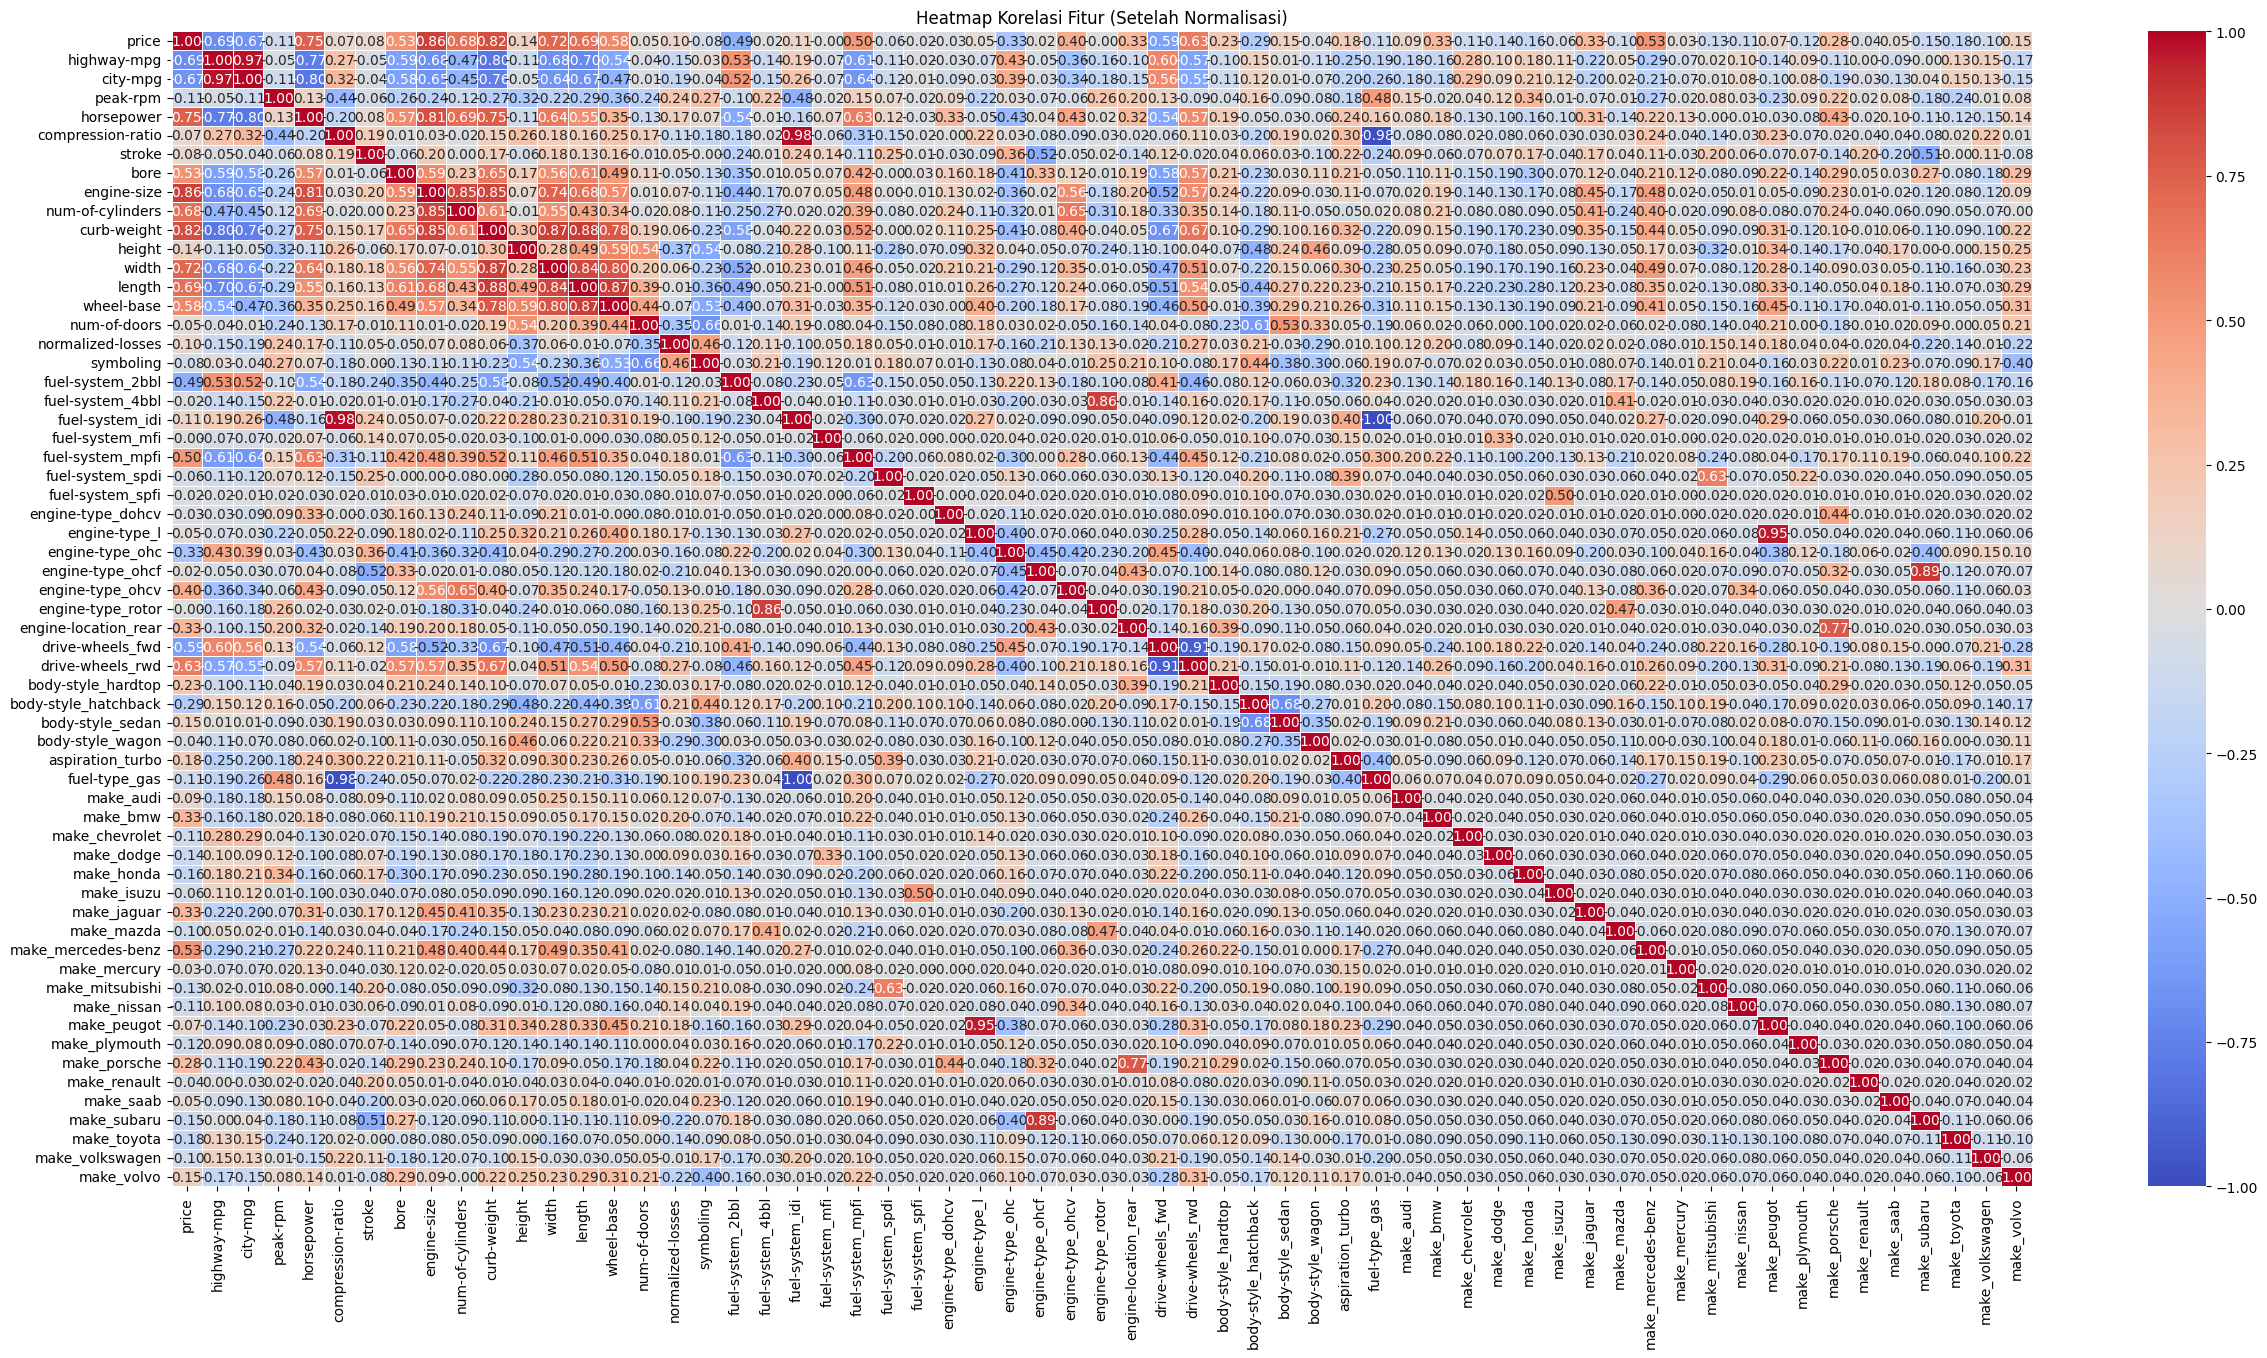

In [ ]:
# Visualisasi Korelasi dengan Heatmap setelah konversi dan normalisasi
plt.figure(figsize=(30, 15))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur (Setelah Normalisasi)")
plt.show()

In [ ]:
X = df_scaled.drop(columns="symboling")
y = df_scaled["symboling"]

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Membuat model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.3836
Root Mean Squared Error (RMSE): 0.6193
R-Squared (R²): 0.6318


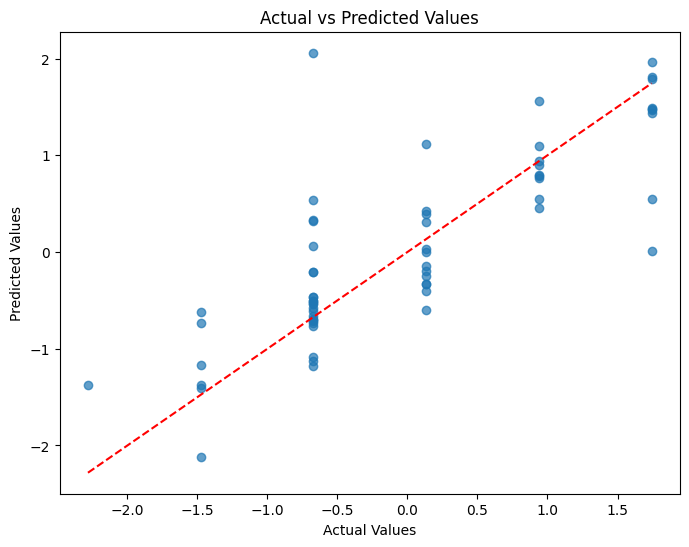

In [ ]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Garis y=x
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definisikan model Ridge Regression
ridge = Ridge()

# Tentukan grid parameter yang ingin diuji
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Coba berbagai nilai alpha
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Training dengan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Alpha:", grid_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_ridge = grid_search.best_estimator_
y_pred_best = best_ridge.predict(X_test)

# Evaluasi model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MSE: {mse_best:.4f}")
print(f"Best Model RMSE: {rmse_best:.4f}")
print(f"Best Model R²: {r2_best:.4f}")

Best Alpha: {'alpha': 10}
Best Model MSE: 0.3411
Best Model RMSE: 0.5841
Best Model R²: 0.6726


In [ ]:
from sklearn.linear_model import Lasso

# Definisikan model Lasso
lasso = Lasso()

# Grid hyperparameter yang ingin diuji
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]  # Coba berbagai nilai alpha
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Training model dengan tuning hyperparameter
grid_search.fit(X_train, y_train)

# Model terbaik
best_lasso = grid_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluasi Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Best Lasso Alpha:", grid_search.best_params_)
print(f"Lasso MSE: {mse_lasso:.4f}")
print(f"Lasso R²: {r2_lasso:.4f}")

Best Lasso Alpha: {'alpha': 0.01}
Lasso MSE: 0.3492
Lasso R²: 0.6648


In [ ]:
from sklearn.linear_model import ElasticNet

# Definisikan model Elastic Net
elastic_net = ElasticNet()

# Grid hyperparameter yang ingin diuji
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularisasi keseluruhan
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Perbandingan antara L1 dan L2
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Training model
grid_search.fit(X_train, y_train)

# Model terbaik
best_elastic_net = grid_search.best_estimator_
y_pred_elastic = best_elastic_net.predict(X_test)

# Evaluasi Model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Best Elastic Net Params:", grid_search.best_params_)
print(f"Elastic Net MSE: {mse_elastic:.4f}")
print(f"Elastic Net R²: {r2_elastic:.4f}")


Best Elastic Net Params: {'alpha': 0.1, 'l1_ratio': 0.1}
Elastic Net MSE: 0.3231
Elastic Net R²: 0.6899


In [ ]:
from sklearn.linear_model import BayesianRidge

# Inisialisasi model Bayesian Ridge
bayesian_ridge = BayesianRidge()

# Training model
bayesian_ridge.fit(X_train, y_train)

# Prediksi
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Evaluasi model
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
rmse_bayesian = np.sqrt(mse_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print(f"Bayesian Ridge MSE: {mse_bayesian:.4f}")
print(f"Bayesian Ridge RMSE: {rmse_bayesian:.4f}")
print(f"Bayesian Ridge R²: {r2_bayesian:.4f}")

Bayesian Ridge MSE: 0.3273
Bayesian Ridge RMSE: 0.5721
Bayesian Ridge R²: 0.6859


Persamaan - persamaan matematika yang digunakan pada MSE, RMSE, dan R-Squared:

1. MSE mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model.
Rumus MSE:
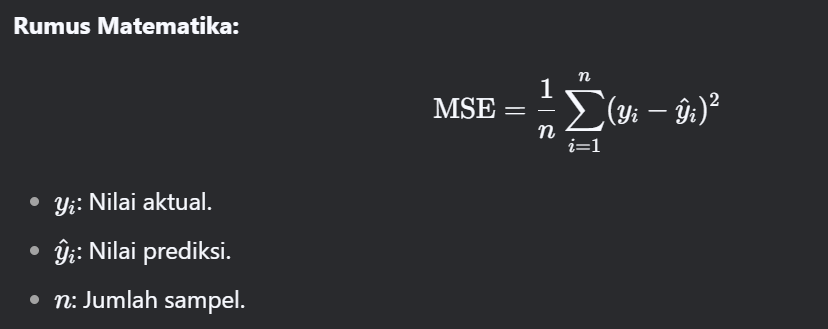

2. RMSE adalah akar kuadrat dari MSE. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi dalam skala yang sama dengan variabel target.
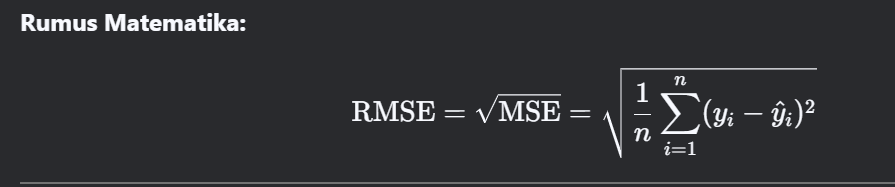
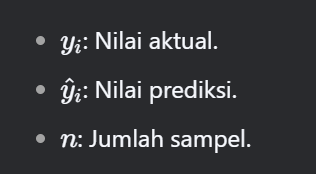

3. R-squared mengukur seberapa baik variabilitas variabel target dapat dijelaskan oleh model. Nilainya berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.
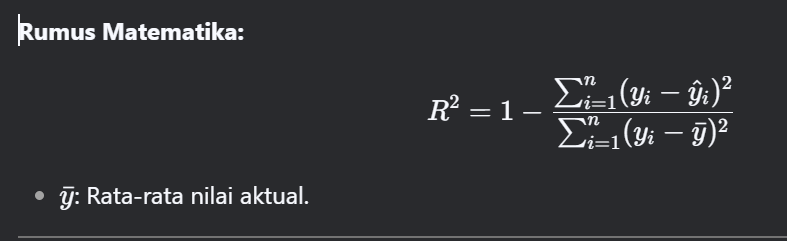